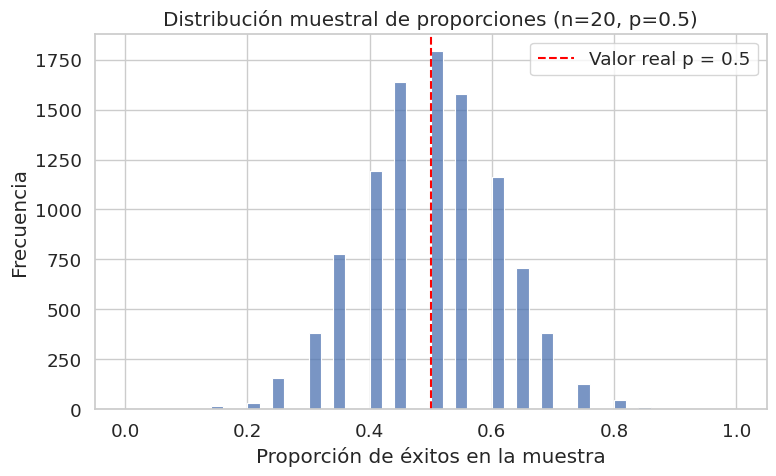

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo gráfico
sns.set(style="whitegrid", palette="deep", font_scale=1.2)
plt.rcParams["figure.figsize"] = (8, 5)

# Parámetros
np.random.seed(42)
n = 20
p = 0.5
n_simulaciones = 10000

# Simular proporciones muestrales
muestras = np.random.binomial(n=n, p=p, size=n_simulaciones)
proporciones = muestras / n

# Graficar distribución muestral
sns.histplot(proporciones, bins=np.arange(0, 1.02, 0.02), kde=False)
plt.axvline(p, color='red', linestyle='--', label='Valor real p = 0.5')
plt.title("Distribución muestral de proporciones (n=20, p=0.5)")
plt.xlabel("Proporción de éxitos en la muestra")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 459.9 kB/s eta 0:00:0000:0100:03


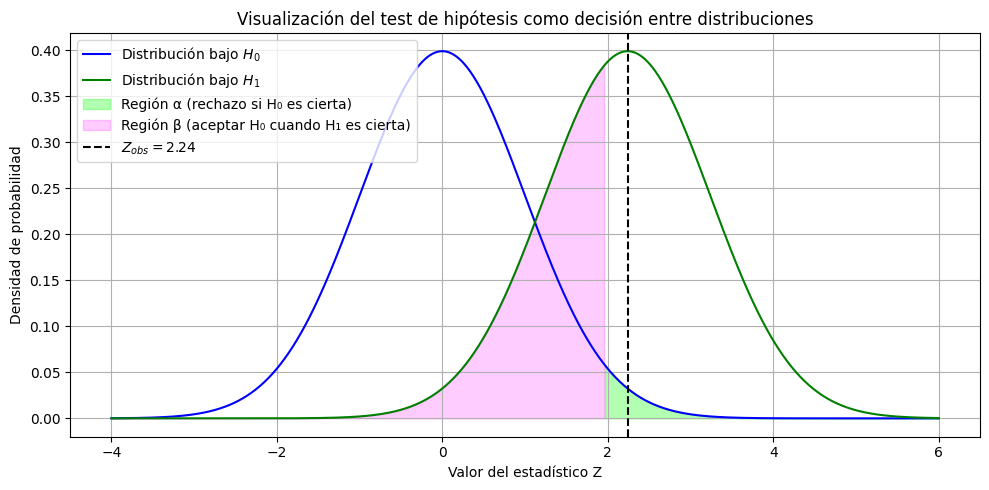

In [2]:
!pip install scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
mu_0 = 0          # media bajo H0 (Z=0)
mu_1 = 2.24       # media bajo H1 (nuestro estadístico observado)
sigma = 1         # desviación estándar (Z-score estándar)
z_alpha = 1.96    # valor crítico para alfa = 0.05

# Rango de valores
x = np.linspace(-4, 6, 1000)

# Densidades
y_0 = norm.pdf(x, mu_0, sigma)
y_1 = norm.pdf(x, mu_1, sigma)

# Crear figura
plt.figure(figsize=(10, 5))
plt.plot(x, y_0, label="Distribución bajo $H_0$", color="blue")
plt.plot(x, y_1, label="Distribución bajo $H_1$", color="green")

# Rellenar región alfa (error tipo I)
plt.fill_between(x, 0, y_0, where=(x >= z_alpha), color="lime", alpha=0.3, label="Región α (rechazo si H₀ es cierta)")

# Rellenar región beta (error tipo II)
plt.fill_between(x, 0, y_1, where=(x <= z_alpha), color="magenta", alpha=0.2, label="Región β (aceptar H₀ cuando H₁ es cierta)")

# Línea vertical en valor observado
plt.axvline(mu_1, color="black", linestyle="--", linewidth=1.5, label="$Z_{obs} = 2.24$")

# Formato del gráfico
plt.title("Visualización del test de hipótesis como decisión entre distribuciones")
plt.xlabel("Valor del estadístico Z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


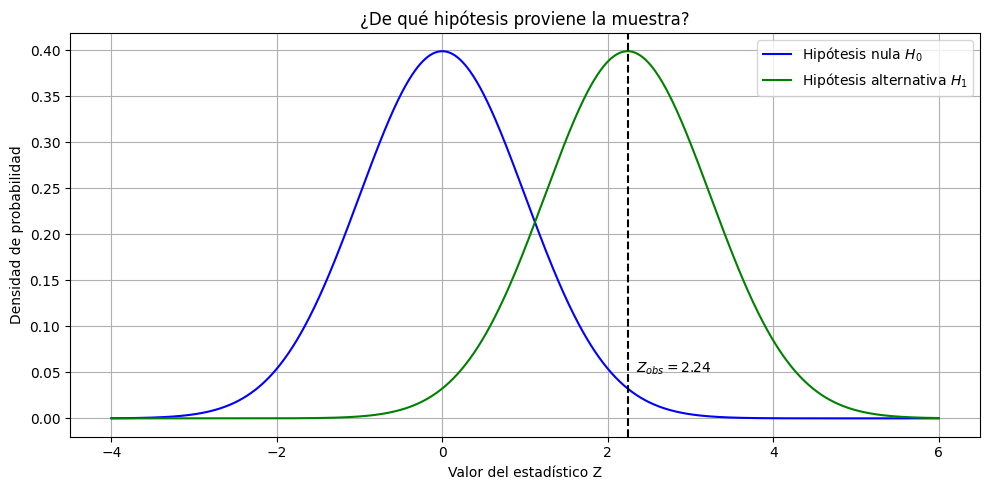

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
mu_0 = 0         # H0 centrado en 0
mu_1 = 2.24      # H1 centrado en valor observado
sigma = 1

# Rango de valores Z
x = np.linspace(-4, 6, 1000)

# Densidades
y_0 = norm.pdf(x, mu_0, sigma)
y_1 = norm.pdf(x, mu_1, sigma)

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y_0, color="blue", label="Hipótesis nula $H_0$")
plt.plot(x, y_1, color="green", label="Hipótesis alternativa $H_1$")

# Línea que muestra el valor observado
plt.axvline(mu_1, color="black", linestyle="--", linewidth=1.5)
plt.text(mu_1 + 0.1, 0.05, "$Z_{obs} = 2.24$", color="black")

# Formato
plt.title("¿De qué hipótesis proviene la muestra?")
plt.xlabel("Valor del estadístico Z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


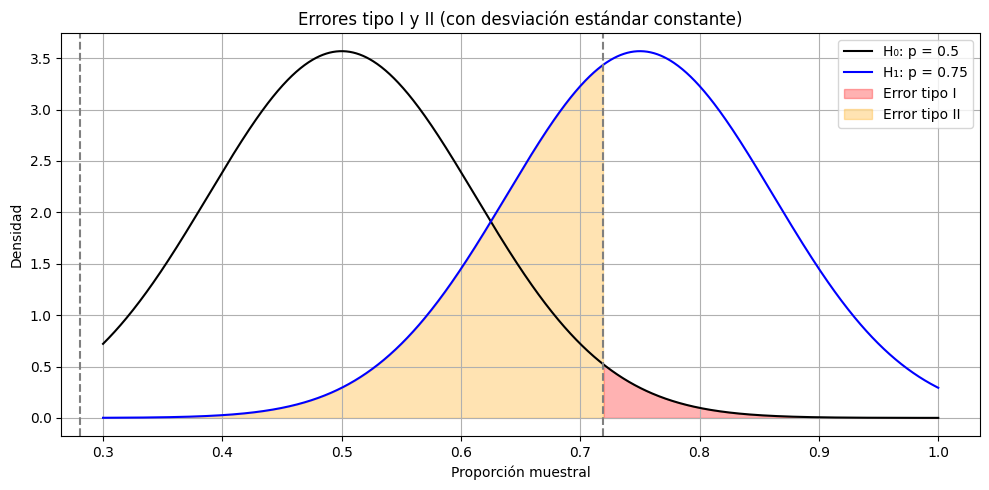

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
n = 20
p0 = 0.5     # H0
p1 = 0.75    # H1
alpha = 0.05

# Desvío estándar único (usamos el de H0)
se = np.sqrt(p0 * (1 - p0) / n)

# Medias
mu0 = p0
mu1 = p1

# Valor crítico bilateral
z_crit = norm.ppf(1 - alpha / 2)
lim_inf = mu0 - z_crit * se
lim_sup = mu0 + z_crit * se

# Eje X y distribuciones
x = np.linspace(0.3, 1.0, 1000)
y0 = norm.pdf(x, mu0, se)
y1 = norm.pdf(x, mu1, se)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y0, label='H₀: p = 0.5', color='black')
plt.plot(x, y1, label='H₁: p = 0.75', color='blue')

# Error tipo I (zona de rechazo bajo H0)
plt.fill_between(x, y0, where=(x <= lim_inf) | (x >= lim_sup), color='red', alpha=0.3, label='Error tipo I')

# Error tipo II (zona de aceptación bajo H1)
plt.fill_between(x, y1, where=(x >= lim_inf) & (x <= lim_sup), color='orange', alpha=0.3, label='Error tipo II')

# Líneas de corte
plt.axvline(lim_inf, color='gray', linestyle='--')
plt.axvline(lim_sup, color='gray', linestyle='--')

# Estética
plt.title('Errores tipo I y II (con desviación estándar constante)')
plt.xlabel('Proporción muestral')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



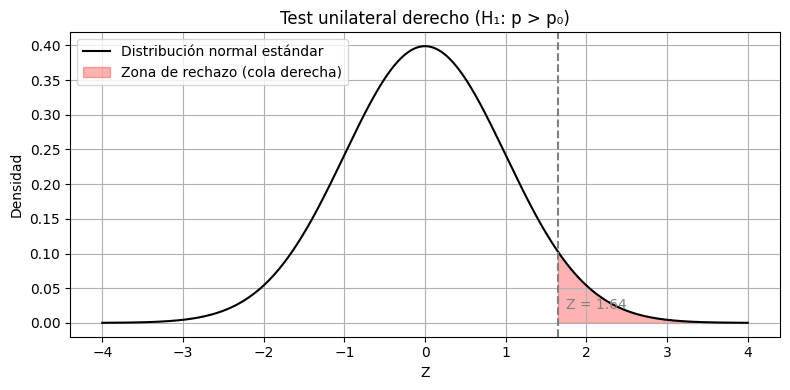

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

alpha = 0.05
z_crit = norm.ppf(1 - alpha)

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, color='black', label='Distribución normal estándar')

# Zona de rechazo
plt.fill_between(x, y, where=(x > z_crit), color='red', alpha=0.3, label='Zona de rechazo (cola derecha)')

# Línea crítica
plt.axvline(z_crit, color='gray', linestyle='--')
plt.text(z_crit + 0.1, 0.02, f'Z = {z_crit:.2f}', color='gray')

plt.title('Test unilateral derecho (H₁: p > p₀)')
plt.xlabel('Z')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


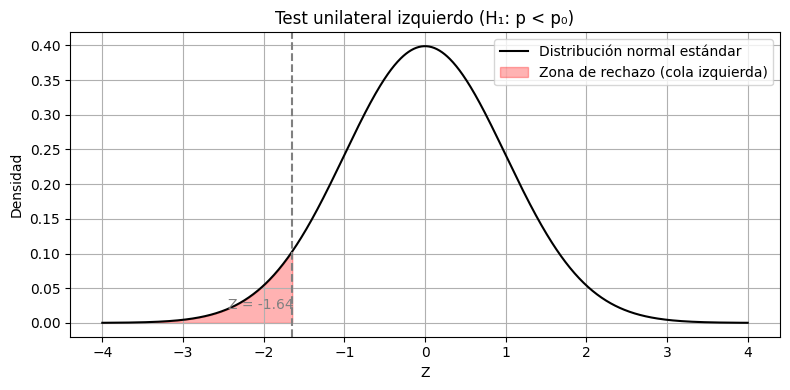

In [4]:
z_crit = norm.ppf(alpha)  # negativo

plt.figure(figsize=(8, 4))
plt.plot(x, y, color='black', label='Distribución normal estándar')

# Zona de rechazo
plt.fill_between(x, y, where=(x < z_crit), color='red', alpha=0.3, label='Zona de rechazo (cola izquierda)')

# Línea crítica
plt.axvline(z_crit, color='gray', linestyle='--')
plt.text(z_crit - 0.8, 0.02, f'Z = {z_crit:.2f}', color='gray')

plt.title('Test unilateral izquierdo (H₁: p < p₀)')
plt.xlabel('Z')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
